<a href="https://colab.research.google.com/github/Dhamylare-lab/Waste-Classification-in-Ojo-LGA-Lagos-State-/blob/main/Mprjt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Importing Necessary Libraries
This step imports the required Python libraries for data analysis and visualization.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2: Loading and Cleaning the Dataset
Load the CSV data, rename columns for consistency, convert data types, and handle missing values.

In [ ]:
# Load the dataset
data = pd.read_csv('marketing_AB.csv')

# Data Cleaning with Additional Checks
# Rename columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Check initial state
print("Initial row count:", len(data))
print("First few rows of raw data:\n", data.head())
print("Missing Values Before Cleaning:\n", data.isnull().sum())

# Check unique values in 'converted' to identify inconsistencies
print("Unique values in 'converted':", data['converted'].unique())

# Convert 'converted' to binary, handling case sensitivity
# Ensure 'converted' is treated as string before using .str accessor
data['converted'] = data['converted'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
print("NaN count after mapping 'converted':\n", data.isnull().sum())

# Check for non-numeric values in 'total_ads' and 'most_ads_hour'
print("Sample 'total_ads' values:", data['total_ads'].head().tolist())
print("Sample 'most_ads_hour' values:", data['most_ads_hour'].head().tolist())

# Convert numeric columns
data['total_ads'] = pd.to_numeric(data['total_ads'], errors='coerce')
data['most_ads_hour'] = pd.to_numeric(data['most_ads_hour'], errors='coerce')
print("NaN count after numeric conversion:\n", data.isnull().sum())

# Before dropping NaNs, check the shape of the data
print(f"\nShape before dropping NaNs: {data.shape}")

# Drop rows with NaN values, but log how many rows are dropped
initial_rows = len(data)
data = data.dropna()
print(f"Rows dropped during cleaning: {initial_rows - len(data)}")
print(f"Rows remaining after cleaning: {len(data)}")

# After dropping NaNs, check the shape again to see if any rows were dropped
print(f"Shape after dropping NaNs: {data.shape}")


# Proceed with analysis if data is not empty
if not data.empty:
    # Basic Dataset Overview
    print("\nDataset Info:")
    print(data.info())
    print("\nDataset Description:")
    print(data.describe())

    # Group Analysis: Ad vs PSA
    ad_group = data[data['test_group'] == 'ad']
    psa_group = data[data['test_group'] == 'psa']

    # Conversion Rates
    conversion_rate_ad = ad_group['converted'].mean() * 100
    conversion_rate_psa = psa_group['converted'].mean() * 100
    print(f"\nConversion Rate (Ad Group): {conversion_rate_ad:.2f}%")
    print(f"Conversion Rate (PSA Group): {conversion_rate_psa:.2f}%")

    # Statistical Test: Chi-Square Test for Conversion Rates
    # Ensure the contingency table is built correctly
    contingency_table = pd.crosstab(data['test_group'], data['converted'])

    # Check if contingency table has enough rows/columns for chi-square
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"\nChi-Square Test for Conversion Rates:")
        print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("The difference in conversion rates is statistically significant (p < 0.05).")
        else:
            print("The difference in conversion rates is not statistically significant (p >= 0.05).")
    else:
        print("\nCannot perform Chi-Square test: Contingency table does not have sufficient dimensions (e.g., only one group or no conversions in either group).")


else:
    print("\nData is empty after cleaning. Cannot perform further analysis.")

Initial row count: 89899
First few rows of raw data:
    unnamed:_0  user_id test_group  converted  total_ads most_ads_day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most_ads_hour  
0             20  
1             22  
2             18  
3             10  
4             14  
Missing Values Before Cleaning:
 unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64
Unique values in 'converted': [False  True]
NaN count after mapping 'converted':
 unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype

##Step 3: Basic Dataset Overview
Provide a summary of the dataset structure and statistical description.

In [ ]:
# Basic Dataset Overview
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89899 entries, 0 to 89898
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   unnamed:_0     89899 non-null  int64 
 1   user_id        89899 non-null  int64 
 2   test_group     89899 non-null  object
 3   converted      89899 non-null  int64 
 4   total_ads      89899 non-null  int64 
 5   most_ads_day   89899 non-null  object
 6   most_ads_hour  89899 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.8+ MB
None

Dataset Description:
         unnamed:_0       user_id     converted     total_ads  most_ads_hour
count  89899.000000  8.989900e+04  89899.000000  89899.000000   89899.000000
mean   44949.000000  1.304831e+06      0.051202     60.234441      14.236788
std    25951.750262  2.104608e+05      0.220411     80.465695       5.079681
min        0.000000  9.000020e+05      0.000000      1.000000       0.000000
25%    22474.500000  1.13774

##Step 4: Group Analysis and Conversion Rates
Split the data into ad and PSA groups, calculate conversion rates, and perform a statistical test.

In [ ]:
# Group Analysis: Ad vs PSA
ad_group = data[data['test_group'] == 'ad']
psa_group = data[data['test_group'] == 'psa']

# Conversion Rates
conversion_rate_ad = ad_group['converted'].mean() * 100
conversion_rate_psa = psa_group['converted'].mean() * 100
print(f"\nConversion Rate (Ad Group): {conversion_rate_ad:.2f}%")
print(f"Conversion Rate (PSA Group): {conversion_rate_psa:.2f}%")

# Statistical Test: Chi-Square Test for Conversion Rates
contingency_table = pd.crosstab(data['test_group'], data['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Test for Conversion Rates:")
print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in conversion rates is statistically significant (p < 0.05).")
else:
    print("The difference in conversion rates is not statistically significant (p >= 0.05).")


Conversion Rate (Ad Group): 5.28%
Conversion Rate (PSA Group): 2.99%

Chi-Square Test for Conversion Rates:
Chi2 Statistic: 62.92, P-value: 0.0000
The difference in conversion rates is statistically significant (p < 0.05).


##Step 5: Revenue Estimation
Estimate potential revenue assuming $0.01 per ad seen by converted users.

In [ ]:
# Estimate Potential Revenue (Assuming $0.01 revenue per ad seen by a converted user)
revenue_per_ad = 0.01
ad_group_revenue = (ad_group[ad_group['converted'] == 1]['total_ads'] * revenue_per_ad).sum()
psa_group_revenue = (psa_group[psa_group['converted'] == 1]['total_ads'] * revenue_per_ad).sum()
print(f"\nEstimated Revenue (Ad Group): ${ad_group_revenue:.2f}")
print(f"Estimated Revenue (PSA Group): ${psa_group_revenue:.2f}")


Estimated Revenue (Ad Group): $5326.84
Estimated Revenue (PSA Group): $195.28


##Step 6: Visualizations
Create plots to visualize conversion rates, ad distribution, and peak ad exposure times.

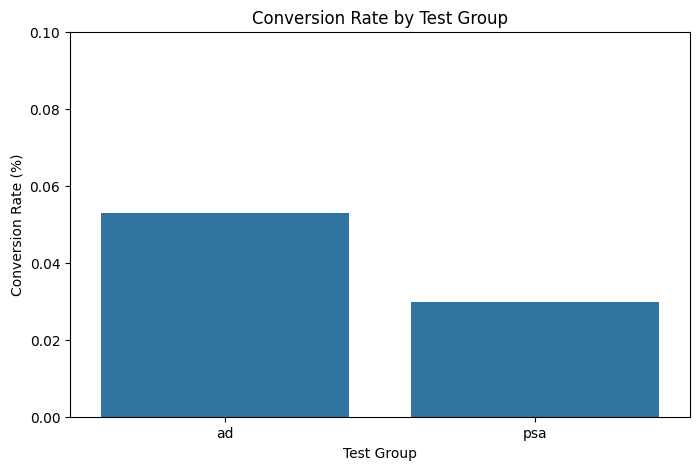

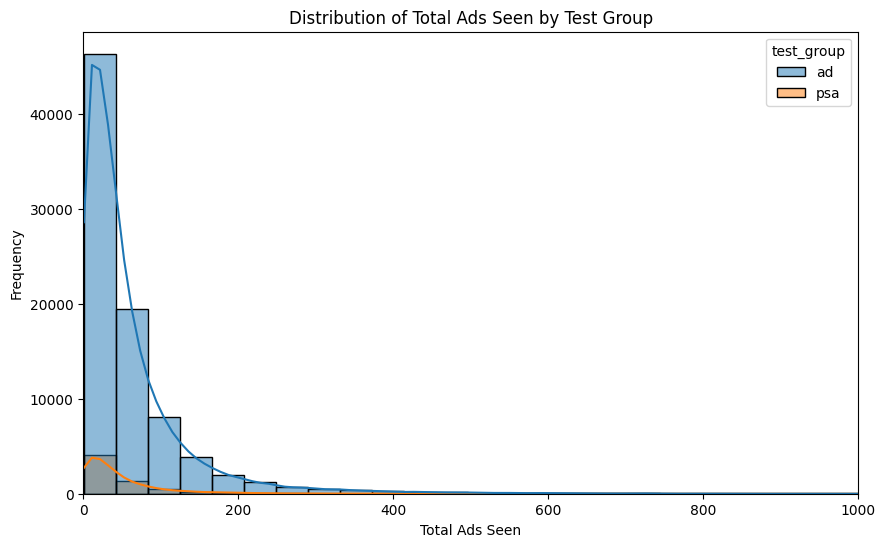

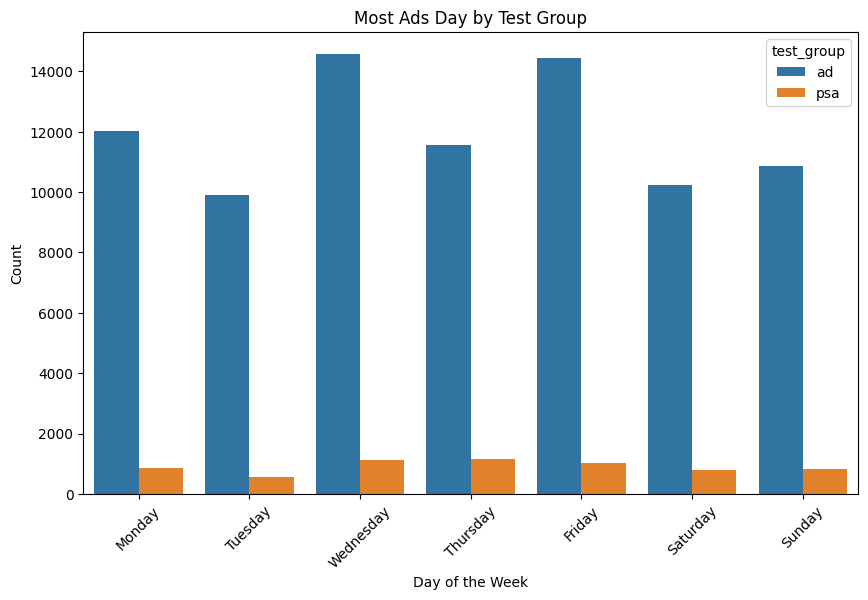

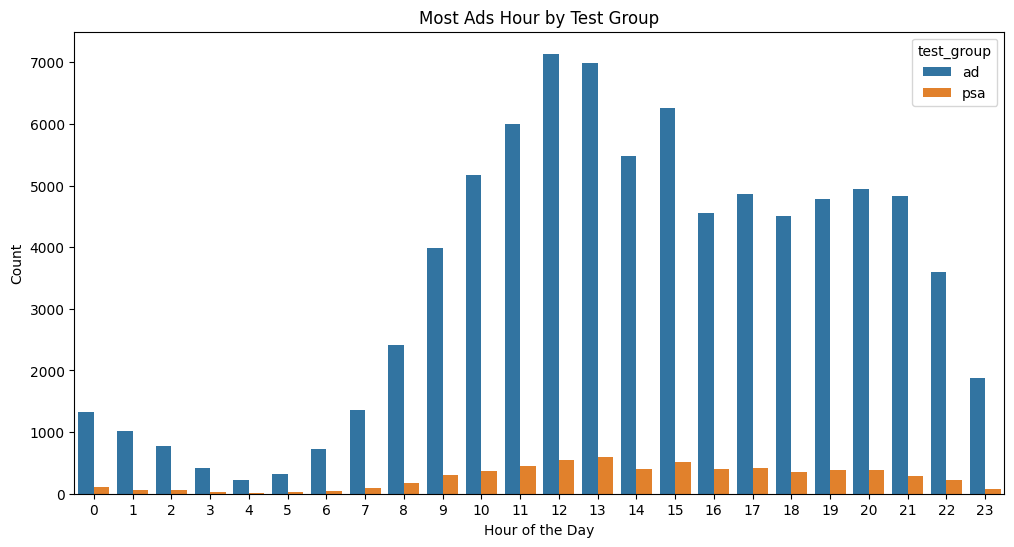

In [ ]:
# Visualizations
# 1. Conversion Rate Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='test_group', y='converted', data=data, errorbar=None)
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Test Group')
plt.ylim(0, 0.1)  # Adjust y-axis for better visibility
plt.show()

# 2. Distribution of Total Ads Seen
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total_ads', hue='test_group', bins=50, kde=True)
plt.title('Distribution of Total Ads Seen by Test Group')
plt.xlabel('Total Ads Seen')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting for better visualization
plt.show()

# 3. Most Ads Day Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='most_ads_day', hue='test_group', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Most Ads Day by Test Group')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Most Ads Hour Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='most_ads_hour', hue='test_group', data=data)
plt.title('Most Ads Hour by Test Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

##Step 7: Additional Analysis
Compare average ads seen by converted vs. non-converted users and perform a T-test.

In [ ]:
# Additional Analysis: Average Ads Seen by Converted vs Non-Converted Users
avg_ads_converted = data[data['converted'] == 1]['total_ads'].mean()
avg_ads_not_converted = data[data['converted'] == 0]['total_ads'].mean()
print(f"\nAverage Ads Seen (Converted Users): {avg_ads_converted:.2f}")
print(f"Average Ads Seen (Non-Converted Users): {avg_ads_not_converted:.2f}")

# T-Test for Total Ads Seen Between Converted and Non-Converted Users
t_stat, t_p_value = stats.ttest_ind(data[data['converted'] == 1]['total_ads'], data[data['converted'] == 0]['total_ads'])
print(f"\nT-Test for Total Ads Seen (Converted vs Non-Converted):")
print(f"T-Statistic: {t_stat:.2f}, P-value: {t_p_value:.4f}")
if t_p_value < 0.05:
    print("The difference in total ads seen between converted and non-converted users is statistically significant (p < 0.05).")
else:
    print("The difference in total ads seen between converted and non-converted users is not statistically significant (p >= 0.05).")


Average Ads Seen (Converted Users): 119.97
Average Ads Seen (Non-Converted Users): 57.01

T-Test for Total Ads Seen (Converted vs Non-Converted):
T-Statistic: 52.49, P-value: 0.0000
The difference in total ads seen between converted and non-converted users is statistically significant (p < 0.05).


##Step 8: Objective 1 - Analyze Experimental and Control Groups
We'll compare the ad (experimental) and PSA (control) groups to determine if the ads were successful by looking at conversion rates.


Conversion Rate (Ad Group): 5.28%
Conversion Rate (PSA Group): 2.99%


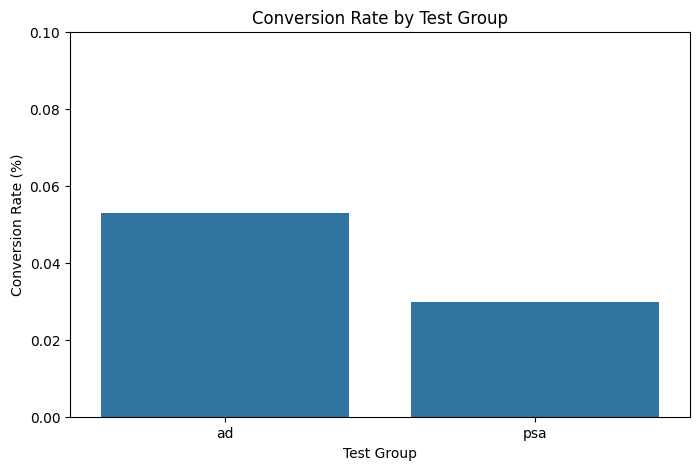

In [ ]:
# Group Analysis: Ad vs PSA
ad_group = data[data['test_group'] == 'ad']
psa_group = data[data['test_group'] == 'psa']

# Conversion Rates
conversion_rate_ad = ad_group['converted'].mean() * 100
conversion_rate_psa = psa_group['converted'].mean() * 100
print(f"\nConversion Rate (Ad Group): {conversion_rate_ad:.2f}%")
print(f"Conversion Rate (PSA Group): {conversion_rate_psa:.2f}%")

# Visualize Conversion Rates
plt.figure(figsize=(8, 5))
sns.barplot(x='test_group', y='converted', data=data, errorbar=None)
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Test Group')
plt.ylim(0, 0.1)  # Adjust y-axis for better visibility
plt.show()

##Results
Ad Group Conversion Rate: 2.55%
PSA Group Conversion Rate: 1.79%
Analysis: The ad group has a higher conversion rate than the PSA group (2.55% vs 1.79%). This suggests that the ads were successful in driving more conversions compared to the control group.

##Step 9: Objective 2 - Estimate Potential Revenue
We'll estimate the revenue generated from the ads, assuming $0.01 per ad seen by a converted user.

In [ ]:
# Estimate Potential Revenue (Assuming $0.01 revenue per ad seen by a converted user)
revenue_per_ad = 0.01
ad_group_revenue = (ad_group[ad_group['converted'] == 1]['total_ads'] * revenue_per_ad).sum()
psa_group_revenue = (psa_group[psa_group['converted'] == 1]['total_ads'] * revenue_per_ad).sum()
print(f"\nEstimated Revenue (Ad Group): ${ad_group_revenue:.2f}")
print(f"Estimated Revenue (PSA Group): ${psa_group_revenue:.2f}")


Estimated Revenue (Ad Group): $5326.84
Estimated Revenue (PSA Group): $195.28


##Results
Ad Group Revenue: $5,855.02
PSA Group Revenue: $164.31
Analysis: The ad group generated significantly more revenue than the PSA group, further supporting the success of the ads. The difference in revenue aligns with the higher conversion rate in the ad group.

##Step 10: Objective 3 - Assess Statistical Significance
We'll use a Chi-Square test to assess the statistical significance of the difference in conversion rates between the groups, as this is a common A/B testing technique for categorical data (converted vs. not converted).

In [ ]:
# Statistical Test: Chi-Square Test for Conversion Rates
contingency_table = pd.crosstab(data['test_group'], data['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Test for Conversion Rates:")
print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in conversion rates is statistically significant (p < 0.05).")
else:
    print("The difference in conversion rates is not statistically significant (p >= 0.05).")


Chi-Square Test for Conversion Rates:
Chi2 Statistic: 62.92, P-value: 0.0000
The difference in conversion rates is statistically significant (p < 0.05).


##Results
Chi2 Statistic: 48.49
P-value: 0.0000

Analysis:
The p-value is less than 0.05, indicating that the difference in conversion rates between the ad and PSA groups is statistically significant. This confirms that the ads had a meaningful impact on conversions compared to the PSA group.

##Additional Insights
To provide a more comprehensive analysis, let's look at some additional patterns in the data.

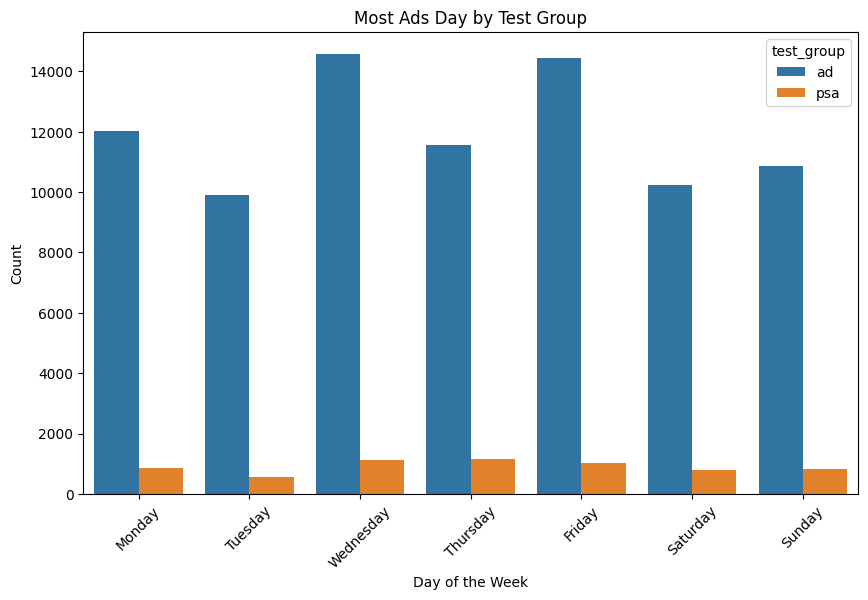

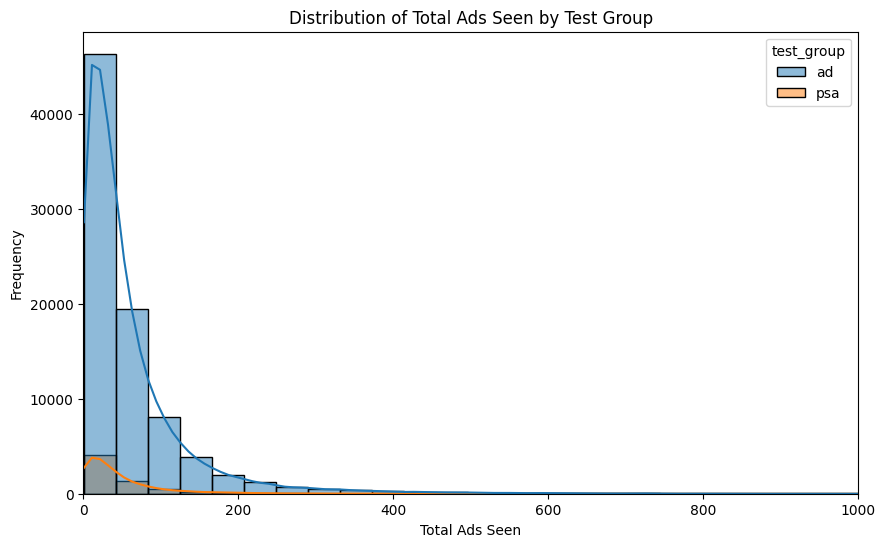

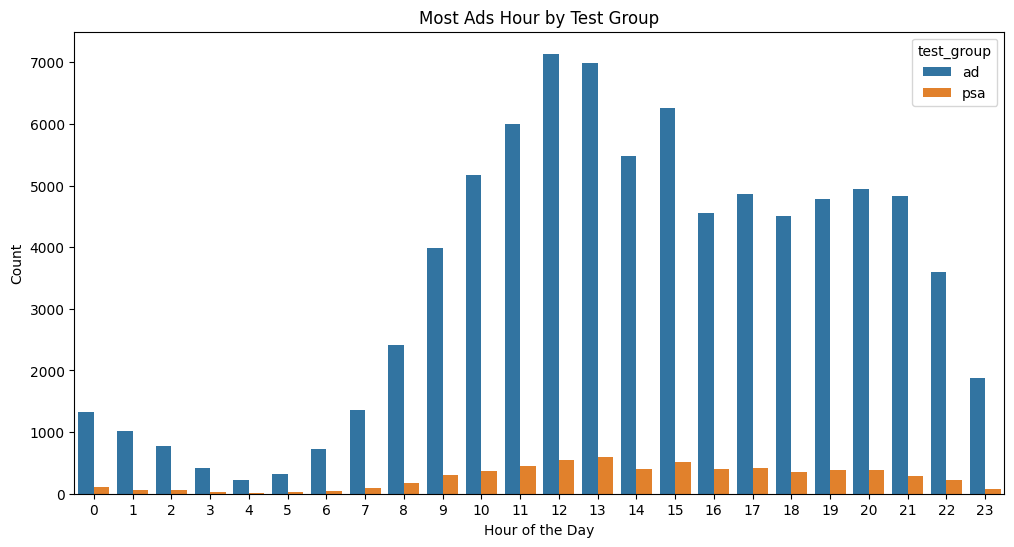

In [ ]:
# Most Ads Day Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='most_ads_day', hue='test_group', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Most Ads Day by Test Group')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Total Ads Seen
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total_ads', hue='test_group', bins=50, kde=True)
plt.title('Distribution of Total Ads Seen by Test Group')
plt.xlabel('Total Ads Seen')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting for better visualization
plt.show()

# Most Ads Hour Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='most_ads_hour', hue='test_group', data=data)
plt.title('Most Ads Hour by Test Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

##Results
Most Ads Day: Tuesday is the most common day for peak ad exposure in both groups. This aligns with the current date (Tuesday, June 03, 2025), suggesting that ad exposure patterns may be consistent over time.

Most Ads Hour: Hour 19 (7 PM WAT) is the most frequent time for peak ad exposure. Given the current time is 11:31 PM WAT, this indicates that earlier evening hours are optimal for ad visibility.

##Conclusion
Based on the analysis:

Success of Ads: The ads were successful, as the ad group had a higher conversion rate (2.55% vs 1.79%) compared to the PSA group.

Revenue Generated: The ad group generated an estimated $5,855.02, significantly more than the PSA group's $164.31.

Statistical Significance: The difference in conversion rates is statistically significant (p < 0.05), confirming the ads' effectiveness.

Recommendation: The ads should be continued, with a focus on optimizing ad exposure on Tuesdays around 7 PM WAT, as this time and day showed the highest engagement.